In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import gridspec
import matplotlib.pylab as pylab

In [4]:
cmap_light = ListedColormap(['#bae4b3', '#cbc9e2', '#9ecae1'])
cmap_bold = ListedColormap(['#238b45', '#6a51a3', '#2171b5'])

x_min, x_max, step = -20, 20.1, 10000
y_min, y_max = 0, 1.1

x = np.linspace(x_min, x_max, step)

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

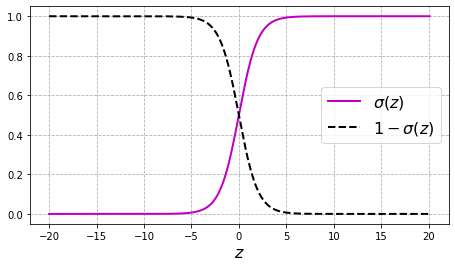

In [4]:
fig, ax = plt.subplots(figsize = (7.5, 4))

ax.plot(x, sigmoid(x), 'm', linewidth = 2, label = '$\sigma(z)$')
ax.plot(x, 1 - sigmoid(x), 'k--', linewidth = 2, label = '$1 - \sigma(z)$')

ax.grid(linestyle='--')
ax.legend(fontsize = 16, loc = 'best')
ax.set_xlabel('$z$', size = 16)

plt.savefig('sigmoid.png')
plt.show()

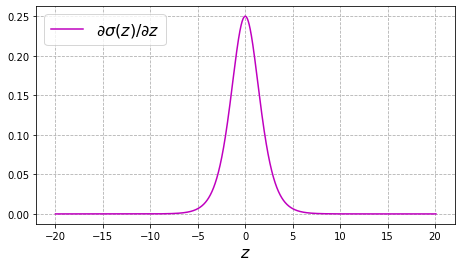

In [5]:
fig, ax = plt.subplots(figsize = (7.5, 4))

ax.plot(x, sigmoid(x) * (1 - sigmoid(x)), 'm', label = '$\partial\sigma(z)/\partial z$')

ax.grid(linestyle='--')
ax.set_xlabel('$z$', size = 16)
ax.legend(fontsize = 16, loc = 'upper left')

plt.savefig('derivative_sigmoid.png')
plt.show()

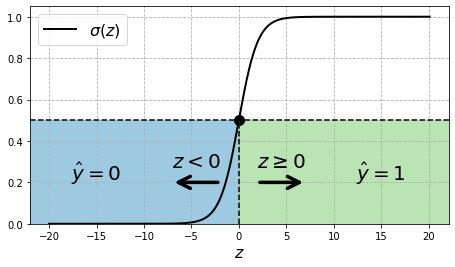

In [6]:
fig, ax = plt.subplots(figsize = (7.5, 4))

ax.plot(x, sigmoid(x), 'k', linewidth = 2, label = '$\sigma(z)$')

xx, yy = np.meshgrid([plt.xlim()[0], 0, 0, plt.xlim()[1]], [0, 1/2])
ax.pcolormesh(xx, yy, [[2, 2, 0, 0], [2,2,2,2]], cmap = cmap_light)

ax.plot([0, 0], [0, 1/2], 'k--')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [1/2, 1/2], 'k--')
ax.scatter(0, 1/2, color = 'k', s= 100)

ax.annotate("", xy=(7, 0.2), xytext=(2, 0.2), size = 30, 
            arrowprops=dict(arrowstyle="->", lw=3.5))

ax.annotate("", xy=(-2, 0.2), xytext=(-7, 0.2), size = 30,
            arrowprops=dict(arrowstyle="<-", lw=3.5))

plt.text(15, 0.25, '$\hat{y} = 1$', size = 20,
         horizontalalignment='center', verticalalignment='center')

plt.text(-15, 0.25, '$\hat{y} = 0$', size = 20,
         horizontalalignment='center', verticalalignment='center')

plt.text(-4.5, 0.3, '$z < 0$', size = 20,
         horizontalalignment='center', verticalalignment='center')

plt.text(4.5, 0.3, '$z \geq 0$', size = 20,
         horizontalalignment='center', verticalalignment='center')

ax.grid(linestyle='--')
ax.legend(fontsize = 16, loc = 'upper left')
ax.set_xlabel('$z$', size = 16)

plt.savefig('decision_region_zspace.png')
plt.show()

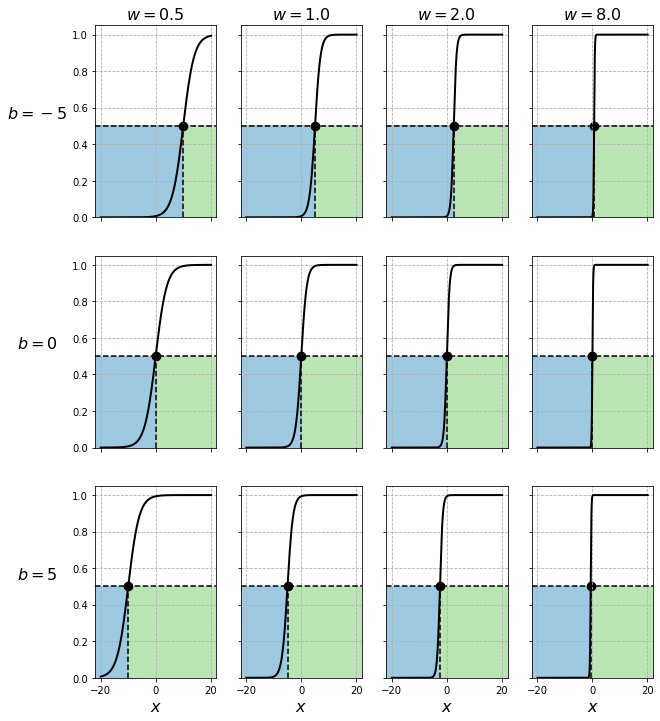

In [9]:
www = np.array([0.5, 1, 2, 8])
bbb = np.array([-5, 0, 5])

fig, axes = plt.subplots(len(bbb), len(www), sharex = True, sharey = True, figsize = (10, 4*len(bbb)))
for nb, b in enumerate(bbb):
    for nw, w in enumerate(www):
        ax = axes[nb, nw]
        ax.plot(x, sigmoid(w * x + b), 'k', linewidth = 2, label = '$w = {}, b = {}$'.format(w, b))
        
        lims = ax.get_xlim()
        xx, yy = np.meshgrid([lims[0], -b/w, -b/w, lims[1]], [0, 1/2])
        ax.pcolormesh(xx, yy, [[2, 2, 0, 0], [2,2,2,2]], cmap = cmap_light)
        
        ax.plot([-b/w, -b/w], [0, 1/2], 'k--')
        ax.plot([lims[0], lims[1]], [1/2, 1/2], 'k--')
        ax.scatter(-b/w, 1/2, color = 'k', s= 75)
        
        ax.set_xlim(lims)
        ax.grid(linestyle='--')

for ax, w in zip(axes[0], www):
    ax.set_title('$w = {}$'.format(w), size = 16)
for ax, b in zip(axes[:,0], bbb):
    ax.set_ylabel('$b = {}$'.format(b), rotation=0, size=16, labelpad=35)
for ax in axes[-1, :]:
    ax.set_xlabel('$x$', size = 16)

plt.savefig('decision_region_xspace.png')
plt.show()

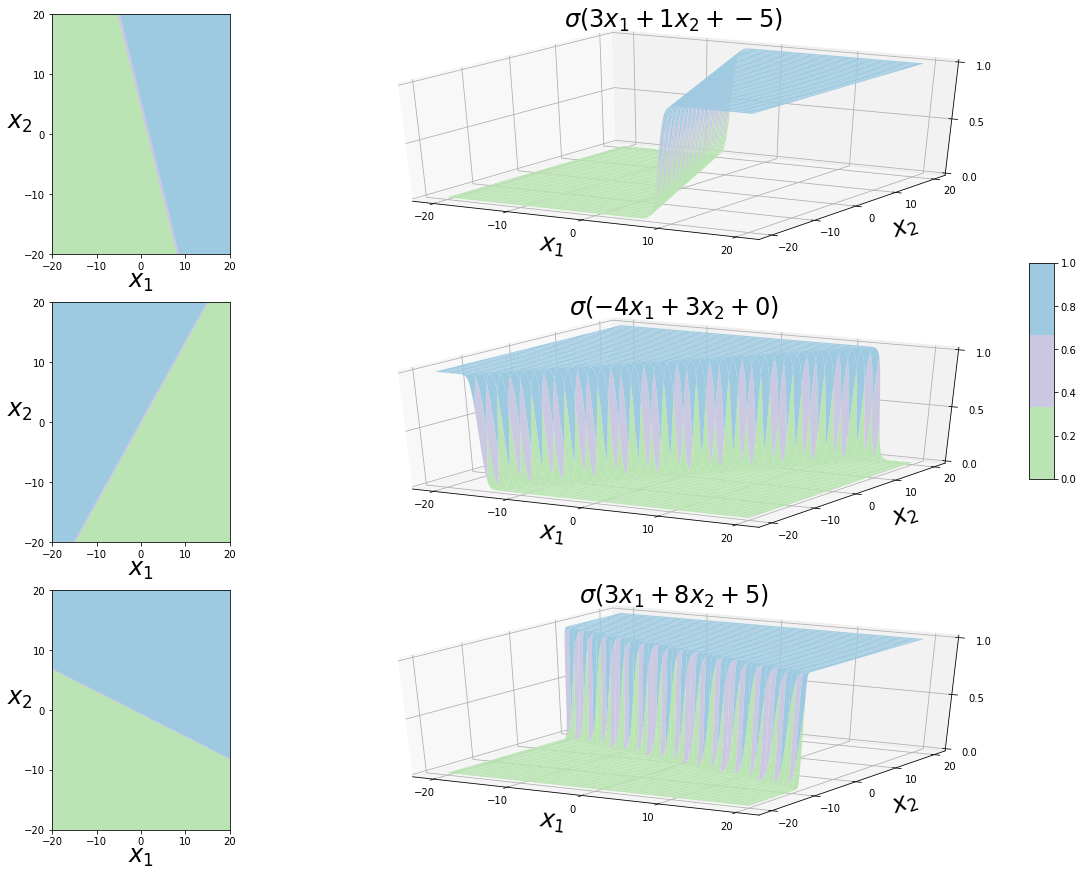

In [47]:
www1 = np.array([3, -4, 3])
www2 = np.array([1, 3, 8])
bbb = np.array([-5, 0, 5])

xx, yy = np.meshgrid(np.arange(-20, 20.1, 0.1), np.arange(-20, 20.1, 0.1))
domain = np.c_[xx.ravel(), yy.ravel()]

fig = plt.figure(figsize = (17.5, 15))
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 4]) 

for q, (ax, w1, w2, b) in enumerate(zip(axes.flatten(), www1, www2, bbb)):   
    ax = plt.subplot(gs[2*q])
    
    z = sigmoid(w1 * domain[:, 0] + w2 * domain[:, 1] + b).reshape(xx.shape)
    CS = ax.contourf(xx, yy, z, levels=2, cmap=cmap_light)
    
    ax.set_xticks([-20, -10, 0, 10, 20])
    ax.set_yticks([-20, -10, 0, 10, 20])    
    
    ax.set_xlabel('$x_1$', size=24, labelpad=-2)
    ax.set_ylabel('$x_2$', rotation=0, size=24)
    
    ax = plt.subplot(gs[2*q + 1], projection='3d')
    surf = ax.plot_surface(xx, yy, z,
                           rstride=8, cstride=8,
                           cmap=cmap_light, linewidth=0)

    ax.set_xticks([-20, -10, 0, 10, 20])
    ax.set_yticks([-20, -10, 0, 10, 20])
    ax.set_zticks([0, 0.5, 1])
    
    ax.set_xlabel('$x_1$', size = 24, labelpad=15)
    ax.set_ylabel('$x_2$', size = 24, labelpad=15)
    ax.set_title('$\sigma({} x_1 + {} x_2 + {})$'.format(w1, w2, b), size = 24)

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.9, 0.45, 0.02, 0.2])
plt.colorbar(surf, shrink=0.5, cax=cbar_ax)

plt.savefig('decision_region_xspace_3d.png')
plt.show()

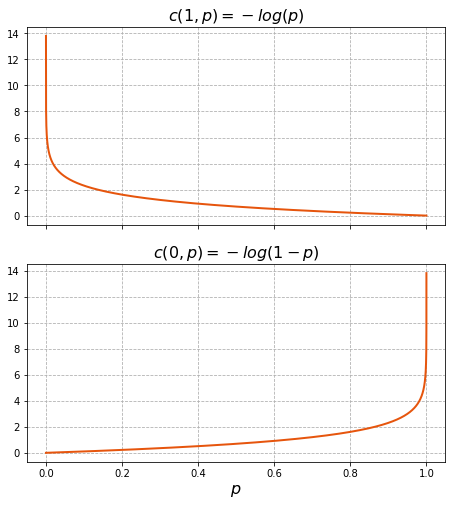

In [11]:
x_min, x_max, step1, step2 = 0, 1, 100, 100

x1 = np.linspace(x_min, x_max, step)[1:-1]
x2 = np.linspace(0, x1[0], step2)[1:-1]
x3 = np.linspace(x1[-1], 1, step2)[1:-1]
x = np.concatenate([x2, x1, x3])

titles = ['$c(1, p) = - log(p)$', '$c(0, p) = - log(1 - p)$']
y_vals = [-np.log(x), - np.log(1 - x)]

fig, axes = plt.subplots(2,1, sharex=True, figsize=(7.5, 8))
for ax, y, t in zip(axes.ravel(), y_vals, titles):
    ax.plot(x, y, color = "#E6550D", linewidth = 2)
    ax.grid(linestyle='--')
    ax.set_title(t, size=16)
axes[1].set_xlabel('$p$', size=16)

plt.savefig('cost_function.png')
plt.show()

In [7]:
from scipy.stats import multivariate_normal

mu1, mu2 = np.array([4, 1]), np.array([1, 7])
sigma1 = np.identity(2)
sigma2 = np.identity(2)
qs1, qs2 = 250, 250

var1 = multivariate_normal(mean=mu1, cov=sigma1)
var2 = multivariate_normal(mean=mu2, cov=sigma2)

samples = np.concatenate((var1.rvs(size = qs1), var2.rvs(size = qs2)), axis=0)
indicator = np.concatenate((np.ones((qs1, 1)), np.zeros((qs2, 1))), axis=0)

xx, yy = np.meshgrid(np.arange(samples[:, 0].min() - 1, samples[:, 0].max() + 1, 0.1),
                     np.arange(samples[:, 1].min() - 1, samples[:, 1].max() + 1, 0.1))
    
domain = np.c_[xx.ravel(), yy.ravel()]

pdf1 = var1.pdf(domain).reshape(xx.shape)
pdf2 = var2.pdf(domain).reshape(xx.shape)
disc = pdf1 >= pdf2

clf = LogisticRegression(max_iter=100)
clf.fit(samples, indicator.ravel())
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

x1opt = xx[0]
x2opt = (0.5 * (np.dot(mu1, mu1) - np.dot(mu2, mu2)) - x1opt * (mu1[0] - mu2[0])) / (mu1[1] - mu2[1])

w1, w2, b = clf.coef_[0][0], clf.coef_[0][1], clf.intercept_

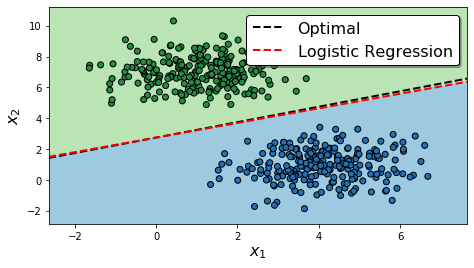

In [109]:
def plot_case(ax, xx, yy, Z, x1opt, x2opt, w1, w2, b, samples, cmap=cmap_light, idx=None):
    ax.pcolormesh(xx, yy, Z, cmap = cmap_light)
    ax.plot(x1opt, x2opt, 'k--', linewidth=2, label = "Optimal")
    ax.plot(xx[0], -b/w2 - xx[0] * w1 / w2, 'r--', linewidth = 2, label = "Logistic Regression")
    ax.scatter(samples[:, 0], samples[:, 1], c=indicator.ravel(), cmap=cmap_bold, alpha = 1, edgecolor="black")
    if idx:
        ax.set_title("Iter = {}".format(idx+1), size=16)


fig, ax = plt.subplots(figsize=(7.5, 4))
plot_case(ax, xx, yy, Z, x1opt, x2opt, w1, w2, b, samples, cmap=cmap_light)
ax.set_xlabel('$x_1$', size = 16)
ax.set_ylabel('$x_2$', size = 16)
ax.legend(loc='best', fancybox=True, shadow=True, edgecolor='k', prop={'size': 16})
plt.savefig('estimated_vs_optimal.png')
plt.show()

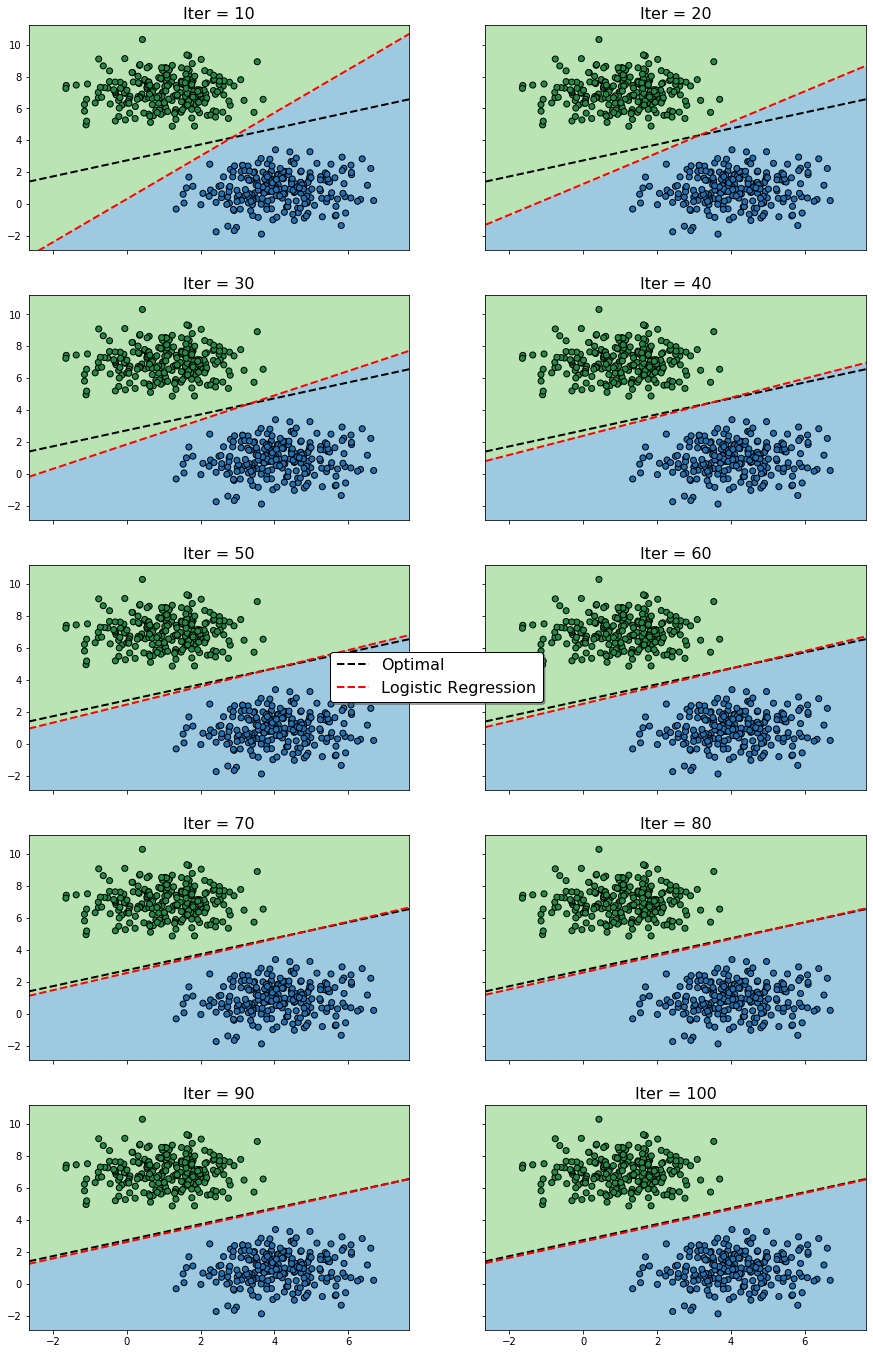

In [110]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

clf = LogisticRegression(warm_start=True, max_iter=1)

ws = []
bs = []
Zs = []
for _ in range(100):
    clf.fit(samples, indicator.ravel())
    ws.append(clf.coef_)
    bs.append(clf.intercept_)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    Zs.append(Z)

idxs = [9, 19, 29, 39, 49, 59, 69, 79, 89, 99]
fig, axes = plt.subplots(5, 2, sharex = True, sharey = True, figsize=(15, 24))
for nax, ax in enumerate(axes.flatten()):
    idx = idxs[nax]
    w1, w2, b, Z = ws[idx][0][0], ws[idx][0][1], bs[idx], Zs[idx]
    plot_case(ax, xx, yy, Z, x1opt, x2opt, w1, w2, b, samples, cmap=cmap_light, idx=idx)
    ax.set_ylim(samples[:, 1].min() - 1, samples[:, 1].max() + 0.9)
    ax.set_xlim(xx[0][0], xx[0][-1])
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center', fancybox=True, shadow=True, edgecolor='k', prop={'size': 16})
# ax.legend(loc='best', fancybox=True, shadow=True, edgecolor='k', prop={'size': 16})

plt.savefig('convergence_steps.png')    
plt.show()

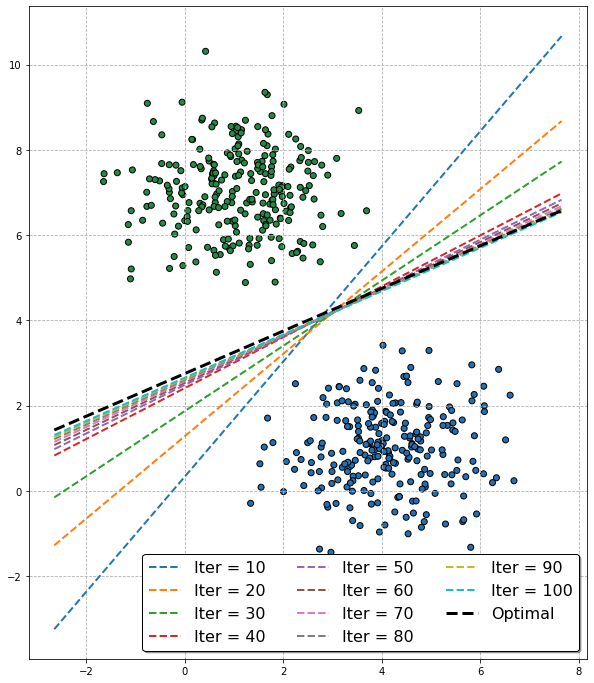

In [111]:
fig, ax = plt.subplots(figsize=(10, 12))

for idx in idxs:
    w1, w2, b, Z = ws[idx][0][0], ws[idx][0][1], bs[idx], Zs[idx]  
    ax.plot(xx[0], -b/w2 - xx[0] * w1 / w2, '--', linewidth = 2, label = "Iter = {}".format(idx+1))
ax.plot(x1opt, x2opt, 'k--', linewidth=3, label = "Optimal")

ax.scatter(samples[:, 0], samples[:, 1], c=indicator.ravel(), cmap=cmap_bold, alpha = 1, edgecolor="black")
ax.legend(loc='best', fancybox=True, shadow=True, edgecolor='k', prop={'size': 16}, ncol=3)
ax.grid(linestyle='--')
plt.savefig('convergence_all_in_one.png')    
plt.show()

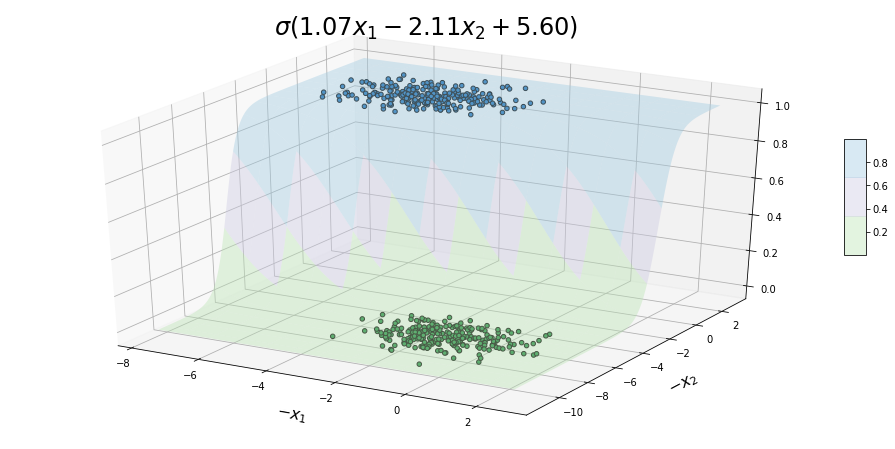

In [112]:
domain = np.c_[xx.ravel(), yy.ravel()]
z = sigmoid(w1 * domain[:, 0] + w2 * domain[:, 1] + b).reshape(xx.shape)

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')


surf = ax.plot_surface(-xx, -yy, z,
                       rstride=8, cstride=8,
                       cmap=cmap_light, linewidth=0, alpha=0.4)
ax.scatter(-samples[:, 0], -samples[:, 1], indicator, c=indicator.ravel(), cmap=cmap_bold, alpha = 1, edgecolor="black", zorder=10)
#     ax.set_xticks([-20, -10, 0, 10, 20])
#     ax.set_yticks([-20, -10, 0, 10, 20])
#     ax.set_zticks([0, 0.5, 1])

ax.set_xlabel('$-x_1$', size = 16, labelpad=15)
ax.set_ylabel('$-x_2$', size = 16, labelpad=15)
ax.set_title('$\sigma({:.2f} x_1 {:.2f} x_2 + {:.2f})$'.format(w1, w2, b[0]), size = 24)


fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.9, 0.45, 0.02, 0.2])
plt.colorbar(surf, shrink=0.5, cax=cbar_ax)

plt.savefig('3d_convergence.png')
plt.show()

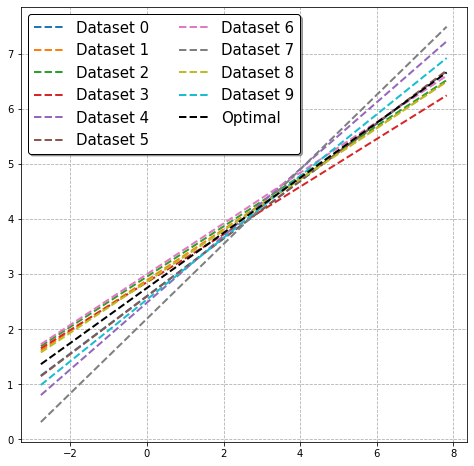

In [46]:
indicator = np.concatenate((np.ones((qs1, 1)), np.zeros((qs2, 1))), axis=0)

fix, ax = plt.subplots(figsize=(8, 8))
clf = LogisticRegression(max_iter=100)
for ndataset in range(10):
    samples = np.concatenate((var1.rvs(size = qs1), var2.rvs(size = qs2)), axis=0)
    clf.fit(samples, indicator.ravel())
    ax.plot(xx[0], -clf.intercept_[0]/clf.coef_[0][1] - xx[0] * clf.coef_[0][0] / clf.coef_[0][1],
            '--', linewidth = 2, label = "Dataset {}".format(ndataset))
ax.plot(x1opt, x2opt, 'k--', linewidth=2, label = "Optimal")
ax.legend(loc='best', fancybox=True, shadow=True, edgecolor='k', prop={'size': 15}, ncol=2)
ax.grid(linestyle='--')
plt.savefig('multiple_datasets_same_problem.png')    
plt.show()

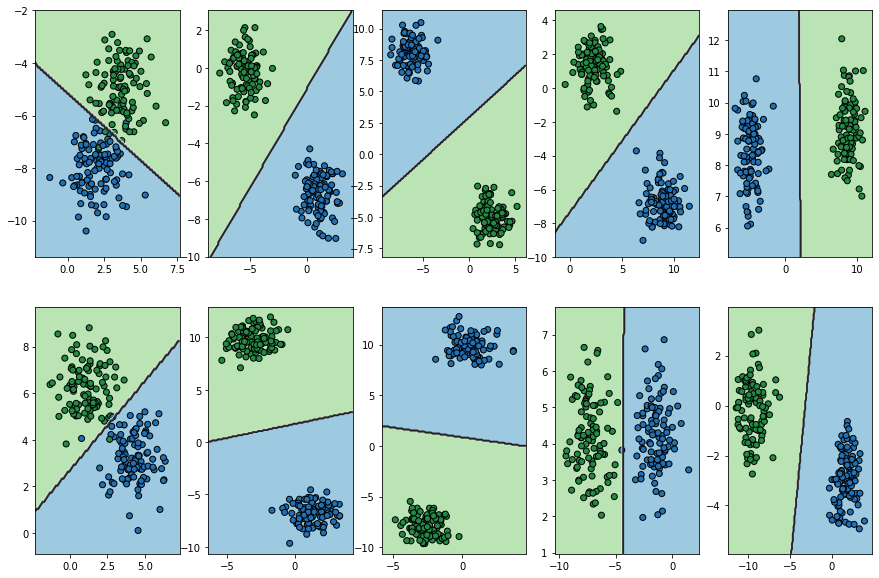

In [98]:
clf = LogisticRegression()
fig, ax = plt.subplots(2, 5, figsize = (15, 10))
axes = ax.ravel()
for ax in axes:
    X, y = make_blobs(n_samples=[100, 100], 
                      centers=None,
                      n_features=2,
                      cluster_std=1)

    clf.fit(X, y)
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.1),
                         np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, cmap=cm.binary)
    ax.pcolormesh(xx, yy, Z, cmap = cmap_light)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, alpha=1, edgecolor="black")
plt.savefig('multiple_datasets_different_problems.png')
plt.show()

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

mu1, mu2 = np.array([0, 5]), np.array([4, 3])
sigma1 = np.array([[1, -0.3], [-0.3, 1]])
sigma2 = np.array([[1, 0.5], [0.5, 1]])
qs1, qs2 = 250, 250

var1 = multivariate_normal(mean=mu1, cov=sigma1)
var2 = multivariate_normal(mean=mu2, cov=sigma2)

samples = np.concatenate((var1.rvs(size = qs1), var2.rvs(size = qs2)), axis=0)
indicator = np.concatenate((np.ones((qs1, 1)), np.zeros((qs2, 1))), axis=0)

xx, yy = np.meshgrid(np.arange(samples[:, 0].min() - 3, samples[:, 0].max() + 3, 0.01),
                     np.arange(samples[:, 1].min() - 1, samples[:, 1].max() + 2, 0.01))
    
domain = np.c_[xx.ravel(), yy.ravel()]

pdf1 = var1.pdf(domain).reshape(xx.shape)
pdf2 = var2.pdf(domain).reshape(xx.shape)
disc = pdf1 >= pdf2

poly_features = PolynomialFeatures(degree=2, include_bias=True)
scaler = StandardScaler()

poly_samples = poly_features.fit_transform(samples)
scaled_poly_samples = scaler.fit_transform(poly_samples)

clf = LogisticRegression(max_iter=10000)
clf.fit(scaled_poly_samples, indicator.ravel())

test_samples = np.c_[xx.ravel(), yy.ravel()]
poly_test_samples = poly_features.transform(test_samples)
scaled_poly_test_samples = scaler.transform(poly_test_samples)

Z = clf.predict(scaled_poly_test_samples)
Z = Z.reshape(xx.shape)

w1, w2, b = clf.coef_[0][0], clf.coef_[0][1], clf.intercept_

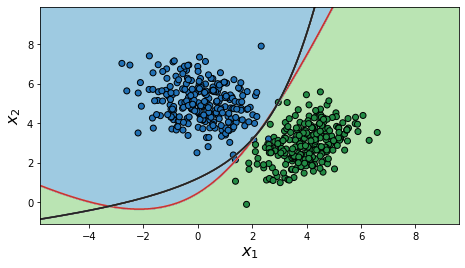

In [49]:
def plot_non_linear_case(ax, xx, yy, Z, disc, w1, w2, b, samples, cmap=cmap_light):
    ax.pcolormesh(xx, yy, Z, cmap = cmap_light)
    ax.contour(xx, yy, Z, cmap=cm.RdBu_r)
    ax.contour(xx, yy, disc, cmap=cm.binary)
    ax.scatter(samples[:, 0], samples[:, 1], c=indicator.ravel(), cmap=cmap_bold, alpha = 1, edgecolor="black")

fig, ax = plt.subplots(figsize=(7.5, 4))
plot_non_linear_case(ax, xx, yy, Z, disc, w1, w2, b, samples, cmap=cmap_light)
ax.set_xlabel('$x_1$', size = 16)
ax.set_ylabel('$x_2$', size = 16)
# ax.legend(loc='best', fancybox=True, shadow=True, edgecolor='k', prop={'size': 16})
plt.savefig('non_linear_decision_boundary.png')
plt.show()